<div class="alert alert-success">
<h3><center>"Banknote Classification Using Artificial Neural Network Approach"<center> </h2>
<ul>
<li style="text-align: left;">
<h3><strong>NAMA &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;: LIYA ANGGRAINI</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>NIM &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; : 09011181722011</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK 5A</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>JURUSAN &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: SISTEM KOMPUTER</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : KECERDASAN BUATAN</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>DOSEN PENGAMPUH: Prof. Dr. Ir. Siti Nurmaini, M.T.</strong></h3>
</li>
</ul>
</div>

# DATASET

Link Dataset : https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Link Jurnal : https://www.researchgate.net/publication/303557354_Banknote_Classification_Using_Artificial_Neural_Network_Approach

## IMPORT PACKAGES
* Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas
* Numpy berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks
* Pandas berfungsi untuk Load Dataset, karena pandas lebih baik untuk load data dengan skala besar
* Matplotlib.pyplot berungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain
* Seaborn untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.
* Sklearn adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya
* Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler.

In [31]:
from keras.models import Sequential #library untuk model lapisan bertumpuk
from keras.layers import Dense #library untuk menambahkan layer
from sklearn.linear_model import LinearRegression #library untuk regresi linear
import matplotlib.pyplot as plt #library untuk membuat plot
from sklearn.model_selection import train_test_split #library untuk membagi data
import numpy as np #library untuk komputasi array
import pandas as pd #library untuk mengolah data
from keras.optimizers import Adam
from keras.activations import relu
import seaborn as s
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# IMPORT DATASET

In [32]:
#import dataset dengan pandas
dataset = pd.read_csv("C:/Users/User/Documents/UAS AI/NN/banknote.txt")

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
varience    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
target      1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [34]:
dataset.tail() #mencetak 5 baris dataset terakhir

,varience,skewness,curtosis,entropy,target
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [35]:
#melihat describsi dari dataset, count: jumlah data , mean : nilai rata2, std : nilai standar deviasi dari data, min: nilai minimal, max: nilai maksimal, 25% : nilai quatile ke 1 , 50% : nilai quartile ke 2, 75% : nilai quartile ke 3
dataset.describe()

,varience,skewness,curtosis,entropy,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Import Data Set

In [36]:
X = dataset.iloc[:, 0:4].values #nilai variabel x diambil dari kolom 0-3 (inputan)
y = dataset.iloc[:, 4].values #nilai variabel y diambil dari kolom ke 4 (output)

In [37]:
#melakukan scaling dataset ini diperlukan karena jika data mempunyai skala yang jauh berbeda misal 0 - 100, maka algoritma machine learning tidak bisa bekerja secara maksimal, bahkan bisa salah, karena itu kita perlu melakukan scaling untuk merubah skala data menjadi 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
#rumus yang bisa kita gunakan:
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
#x_scaled akan merubah atau melakukan scaling pada nilai variabel x 
x_scaled = scaler.fit_transform(X)
x_scaled

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

## BOX PLOT
Penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

varience       AxesSubplot(0.125,0.816017;0.352273x0.0639831)
skewness    AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
curtosis       AxesSubplot(0.125,0.739237;0.352273x0.0639831)
entropy     AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
target         AxesSubplot(0.125,0.662458;0.352273x0.0639831)
dtype: object

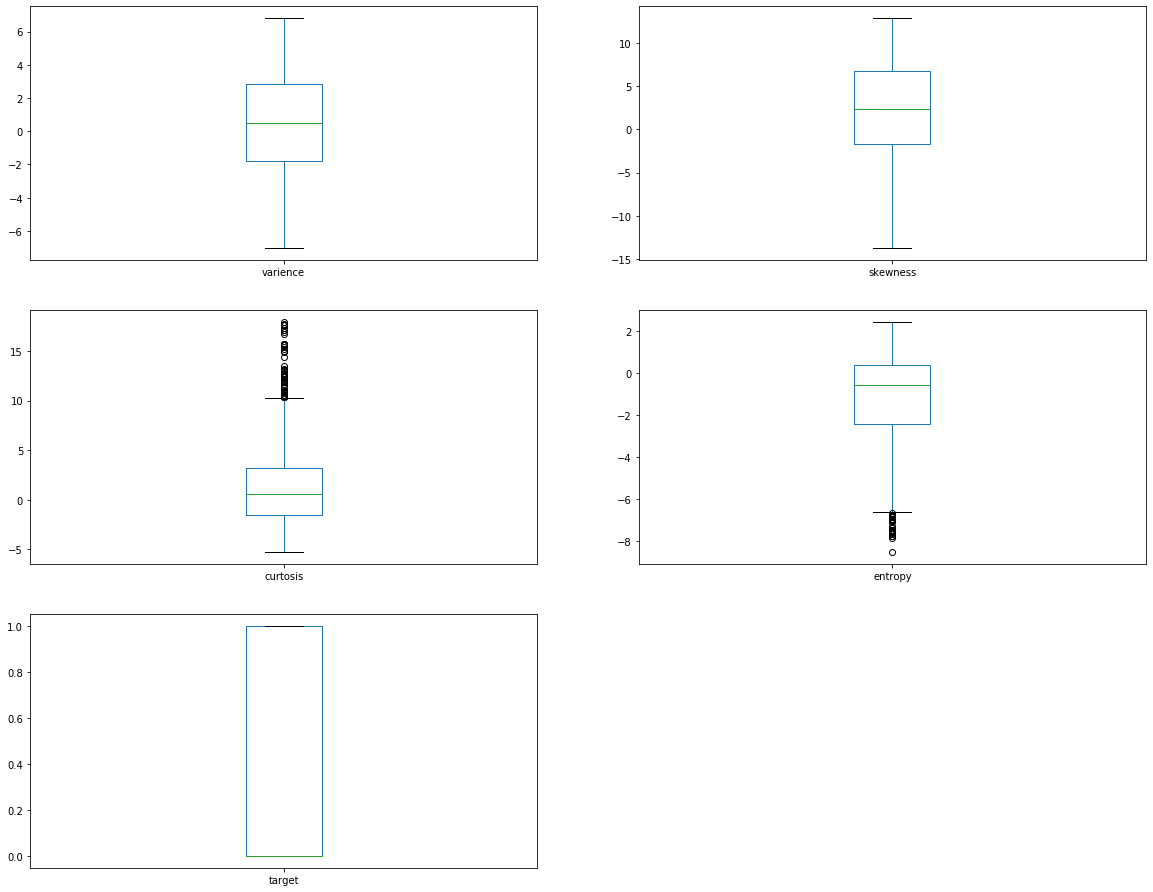

In [39]:
#Boxplot adalah salah satu cara dalam statistik deskriptif untuk menggambarkan secara grafik dari data numeris melalui lima ukuran yaitu: 1) nilai observasi terkecil 2) kuartil terendah atau kuartil pertama (Q1), yang memotong 25 % dari data terendah; 3) median (Q2) atau nilai pertengahan; 4) kuartil tertinggi atau kuartil ketiga (Q3), yang memotong 25 % dari data tertinggi; 5) nilai observasi terbesar. Selain itu, dalam boxplot juga ditunjukkan, jika ada, nilai outlier dari observasi.
dataset.plot(kind='box', subplots=True, layout=(10,2), sharex=False, sharey=False, figsize=(20,55))

In [40]:
#untuk mengkonversi kelas bilangan bulat menjadi kelas bilangan biner, pada kodingan ini kita melakukan konversi pada nilai keluaran, yang dimana di set menjadi dua kelas yaitu 0 atau 1 dalam biner
from keras.utils.np_utils import to_categorical
y_categorical = to_categorical(y)
y_categorical.shape

(1372, 2)

# Splitting data

In [41]:
#membagi dataset dengan training 70% dari data dan testing 15% dari data, sisa nya akan digunakan untuk validasi,dan setiap data pilih secara acak
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_categorical, 
                                                   train_size=0.7,
                                                   test_size=0.15, 
                                                   random_state=7)

<div class="alert alert-success">
 <font size="3"><p align="justify">Pendeklarasian Variabel dengan ketentuan sebagai berikut : 

<ul>
<li style="text-align: left;">
X_train = Ini adalah variabel yang akan digunakan untuk data training X
</li>
</ul>

<ul>
<li style="text-align: left;">
X_test = Ini adalah variabel yang akan digunakan untuk data testing X
</li>
</ul>

<ul>
<li style="text-align: left;">
y_train =Ini adalah variabel yang akan digunakan untuk data training Y
</li>
</ul>

<ul>
<li style="text-align: left;">
y_test = ini adalah variabel yang akan digunakan untuk data testing Y
</li>
</ul>

Pada codingan di atas, saya menggunakan modul train_test_split untuk membagi data yang akan digunakan untuk testing dan training, data untuk testing sebesar 15%, dan data untuk training sebesar 70%.
<div>

In [42]:
#mencetak ukuran data training dan testing, dimana X_train dan X_test untuk masukan, sedangkan y_train dan y_test untuk keluaran
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (960, 4) (960, 2)
Testing data shape :  (206, 4) (206, 2)


In [43]:
# mencetak kelas keluaran yang dihasilkan (0 atau 1)
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', classes)
print('Output classes : ', nClasses)

Total number of outputs :  [0. 1.]
Output classes :  2


## HISTOGRAM
Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

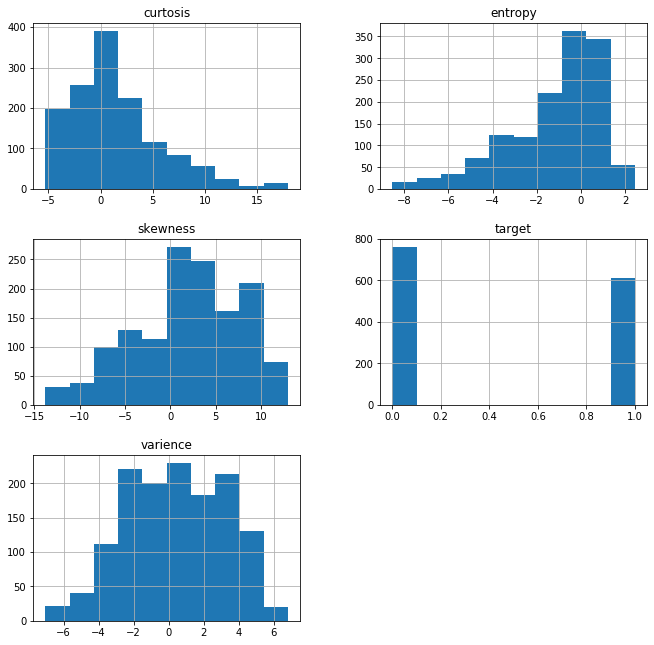

In [44]:
dataset.hist(figsize=(11,11))
plt.show()

## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [45]:
#membuat jaringan saraf dengan model sekuensial dengan menggunakan 4 input dengan neuron 4 fungsi aktifasi relu dan 1 hidden layer dengan neuron 10 fungsi aktifasi relu, menggunakan bias 0,4 dan 1 keluaran dengan fungsi aktifasi sigmoid, fungsi relu (f(x)= max(0,x) akan menghasil 0 atau x, apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x, sedangkan fungsi sigmoid (1 / (1 + exp (-x))) akan menerima angka tunggal dan mengubah nilai x menjadi sebuah nilai yang memiliki range mulai dari 0 sampai 1
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu', use_bias= 0.4))
model.add(Dense(10, activation='relu', use_bias= 0.4))
model.add(Dense(2, activation='softmax'))

# Compile Model

Model Dicompile dengan Optimizer adam dengan fungsi loss Binary Crossentropy

In [46]:
#Sebelum melatih sebuah model, perlu mengkonfigurasi proses pembelajaran, yang dilakukan melalui metode kompilasi, untuk melihat kesalahan yang terjadi dengan menggunakan fungsi kesalahan binary cressentropy artinya fungsi loss yang kita gunakan untuk meminimalisir terjadi nya error pada jaringan , untuk pengoptimal menggunakan fungsi adam adalah variant dari algoritma gradient descent, Daftar metrik yang akan dievaluasi oleh model selama pelatihan dan pengujian. Dengan menggunakan menggunakan metrik = ['akurasi']. metric kita menggunakan akurasi untuk menentukan akurasi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.summary() #menampilkan model yang kita buat

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [48]:
#untuk melatih model kita menggunakan model.fit dimana X_train adalah numpy array yang digunakan sebagai data training untuk inputan, y_test adalah numpy array yang digunakan untuk data target atau keluaran, batch_size jumlah sampel per pembaharuan gradien jika tidak kita set maka nilai nya akan menggunakan nilai default yaitu 32, epochs jumlah epochs untuk melatih model, epochs adalah iterasi atas seluruh data x dan y yang disediakan, 1 kali epochs sama dengan satu kali perhitungan maju mundur, validation_data(15%) untuk mengevaluasi kerugian dan metrik model apa pun pada setiap akhir epochs.  
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

Train on 960 samples, validate on 206 samples
Epoch 1/100
960/960 [==============================] - 3s 3ms/step - loss: 0.6601 - acc: 0.5708 - val_loss: 0.6286 - val_acc: 0.6796
Epoch 2/100
960/960 [==============================] - 0s 429us/step - loss: 0.6272 - acc: 0.6490 - val_loss: 0.5948 - val_acc: 0.7087
Epoch 3/100
960/960 [==============================] - 0s 454us/step - loss: 0.5871 - acc: 0.7125 - val_loss: 0.5506 - val_acc: 0.7961
Epoch 4/100
960/960 [==============================] - 0s 388us/step - loss: 0.5315 - acc: 0.8448 - val_loss: 0.4937 - val_acc: 0.8835
Epoch 5/100
960/960 [==============================] - 0s 413us/step - loss: 0.4673 - acc: 0.9062 - val_loss: 0.4352 - val_acc: 0.8981
Epoch 6/100
960/960 [==============================] - 0s 421us/step - loss: 0.4073 - acc: 0.9104 - val_loss: 0.3852 - val_acc: 0.9126
Epoch 7/100
960/960 [==============================] - 0s 429us/step - loss: 0.3597 - acc: 0.9104 - val_loss: 0.3485 - val_acc: 0.9126
Epoch 8/100

Epoch 61/100
960/960 [==============================] - 0s 504us/step - loss: 0.0221 - acc: 0.9979 - val_loss: 0.0194 - val_acc: 0.9951
Epoch 62/100
960/960 [==============================] - 0s 350us/step - loss: 0.0222 - acc: 0.9979 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 63/100
960/960 [==============================] - 0s 396us/step - loss: 0.0232 - acc: 0.9958 - val_loss: 0.0196 - val_acc: 0.9951
Epoch 64/100
960/960 [==============================] - 0s 454us/step - loss: 0.0208 - acc: 0.9979 - val_loss: 0.0181 - val_acc: 0.9951
Epoch 65/100
960/960 [==============================] - 0s 433us/step - loss: 0.0208 - acc: 0.9969 - val_loss: 0.0190 - val_acc: 0.9951
Epoch 66/100
960/960 [==============================] - 0s 446us/step - loss: 0.0200 - acc: 0.9969 - val_loss: 0.0224 - val_acc: 0.9951
Epoch 67/100
960/960 [==============================] - 0s 350us/step - loss: 0.0203 - acc: 0.9969 - val_loss: 0.0186 - val_acc: 0.9951
Epoch 68/100
960/960 [==========================

* Epoch adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation)

In [49]:
#mencetak akurasi yang di dapat,model.evaluate digunakan untuk mencetak nilai loss dan metrics yang dihasilkan
scores = model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

960/960 [==============================] - 0s 71us/step

loss: 0.01%

acc: 99.79%


In [50]:
#mencetak predict dari input yang akan diperoleh
predict = model.predict(x_scaled)
predict

array([[9.9990332e-01, 9.6678727e-05],
       [9.9996686e-01, 3.3080734e-05],
       [9.9994802e-01, 5.1960738e-05],
       ...,
       [2.0162889e-03, 9.9798369e-01],
       [1.3901104e-03, 9.9860990e-01],
       [5.0732191e-04, 9.9949265e-01]], dtype=float32)

## CONFUSION MATRIX
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [51]:
#Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_categorical.argmax(axis=1),predict.argmax(axis=1))

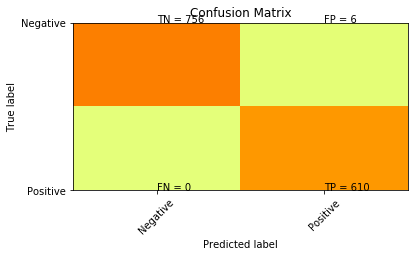

In [74]:
#agar lebih mudah membaca confusion matrix bisa kita tampilkan dalam bentuk plot,
# keterangan dari plot, TN : True Negatif, FP: False positif, FN : False negatif, TP : true positif
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## AKURASI

In [76]:
#akurasi adalah tingkat kedekatan pengukuran kuantitas terhadap nilai yang sebenarnya.
#akurasi = ((Tp+Tn)/(Tp+Fp+Fn+Tn))
akurasi = ((610 + 761)/(610+1+0+761)*100)
print("\n%s: %.2f%%" % ("Akurasi ", akurasi*100))


Akurasi : 9992.71%


## RECALL
* Recall (R) adalah distraksi dari salah satu gambar yang benar dari jumlah yang paling banyak dari kelas x.
* recal = TP / TP + FN

In [77]:
recall = 610 / (610 + 0)
print("\n%s: %.2f%%" %("Recall", recall*100))


Recall: 100.00%


## PRECISION
* Precision (P), juga disebut nilai prediktif positif, adalah pecahan dari gambar yang diklasifikasi dengan benar di atas jumlah total gambar yang diklasifikasikan.
* precision = TP / TP + FP

In [80]:
precision = 610 / (610 + 1)
print("\n%s: %.2f%%" % ("precision", precision*100))


precision: 99.84%


### TRUE NEGATIF RATE

In [78]:
TrueNegatifRate = ((6) / (756+6))
print("\n%s: %.2f%%" % ("TrueNegatifRate",TrueNegatifRate))


TrueNegatifRate: 0.01%


## TRAINING AND TESTING ACCURACY

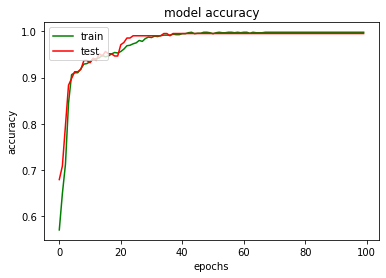

In [82]:
#mencetak plot dari hasil akurasi
plt.plot(history.history['acc'], color='green')
plt.plot(history.history['val_acc'], color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## TRAINING AND TESTING LOSS

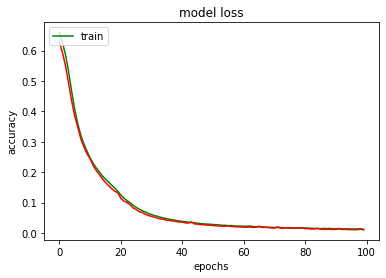

In [83]:
#mencetak plot dari hasil loss
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='red')
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc='upper left')
plt.show()

In [57]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

C:\Users\User\Anaconda3\envs\TersorFlow\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8628216741149011

C:\Users\User\Anaconda3\envs\TersorFlow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


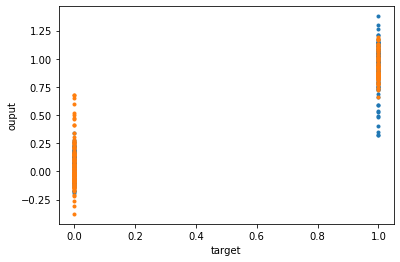

In [58]:
# # plot prediction menghasilkan prediksi keluaran dari sampel masukan, dan mencetak dalam bentuk regresi linier, untuk data testing
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 1,0.1)
y = x
plt.xlabel('target')
plt.ylabel('ouput')
plt.plot(x, y)
plt.show()

In [59]:
model.predict(X_train) # Predict unkown data

array([[-0.0628406 ,  1.0628406 ],
       [ 1.03758961, -0.03758961],
       [ 0.08251812,  0.91748188],
       ...,
       [ 0.02943705,  0.97056295],
       [ 0.06474035,  0.93525965],
       [ 0.36360849,  0.63639151]])

C:\Users\User\Anaconda3\envs\TersorFlow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


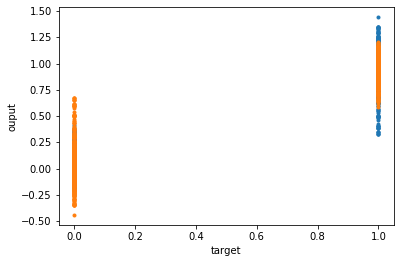

In [60]:
# # plot prediction menghasilkan prediksi keluaran dari sampel masukan, dan mencetak dalam bentuk regresi linier, untuk data training
y_pred1 = model.predict(X_train) 
plt.plot(y_train, y_pred1, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 1,0.1)
y = x
plt.xlabel('target')
plt.ylabel('ouput')
plt.plot(x, y)
plt.show()